In [1]:
from sdRDM import DataModel
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

#from CaliPytion.tools.standardcurve import StandardCurve

In [3]:
lib = DataModel.from_git(url="https://github.com/FAIRChemistry/CaliPytion.git")
lib.Calibration()

Calibration(id='calibration0', reactant_id=None, date=None, pH=None, temperature=None, temperature_unit=None, device=None, standard=[], spectrum=None, result=None)

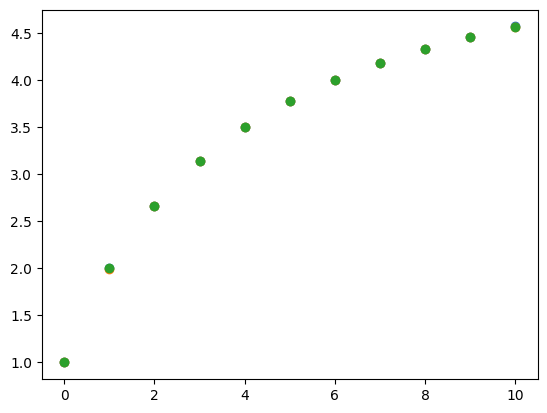

In [65]:
def poly(x,a,b,c):
    return a*x / (b+x)

a=5
b=4
c=2

conc = np.linspace(0,10,11)
abso = poly(x = conc,a=a,b=b,c=c)
data = np.tile(abso, 3).reshape((3,len(conc)))

for i in range(len(data)):
    data[i] = data[i] + np.random.normal(1,0.001, len(conc))

for d in data:
    plt.scatter(conc,d)

In [85]:
standard

Standard(id='standard6', wavelength=420.0, concentration=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], concentration_unit='mmole / l', absorption=[Series(id='series18', values=[0.9997384106300202, 1.999795725659166, 2.665542669772835, 3.142026257386323, 3.498984164175635, 3.778628953037457, 3.9993558786893635, 4.180721541924484, 4.334877706327628, 4.461647121271667, 4.572815592278681]), Series(id='series19', values=[0.9999221843383662, 1.9976304467378116, 2.6660179785681524, 3.1441040416580037, 3.4996522410059807, 3.7776237416770257, 3.999761711942509, 4.181498075095829, 4.334281318835995, 4.460845817570341, 4.571360732129948]), Series(id='series20', values=[0.9995870065160967, 1.9997260105798609, 2.665308904599379, 3.141710174888493, 3.4997299267160713, 3.777323156565652, 4.000514110669437, 4.180675307288309, 4.332998860018208, 4.46207321132099, 4.570361427499233])])

In [89]:
standard = lib.Standard(wavelength=420, concentration=list(conc),
                        concentration_unit="mmole / l",
                        absorption = [lib.Series(values=x.tolist()) for x in data])

calibration = lib.Calibration(reactant_id="s0", pH=7, temperature=37,
                              temperature_unit="C", standard=[standard])
calibration.json()

AttributeError: 'numpy.float64' object has no attribute 'items'

In [67]:

with open("rational_test.xml", "w") as f:
    f.write(calibration.xml())

In [73]:
standard_curve = StandardCurve.from_datamodel(calibration)

for model in standard_curve.models.values():
    print(model.params)
    print(model.aic)
    print(standard_curve.conc_unit)
    #model.visualize_residuals()
    plt.show()

Found calibration data at 420.0 nm
Standard curve data was blanked.
{'a': 0.43757483103287387}
-34.903165432461684
None
{'b': 0.8010673609629945, 'a': -0.046262685626920895}
-121.47912205253496
None
{'c': 1.0272337230590642, 'a': 0.005194766469416546, 'b': -0.11855130327269187}
-204.75066464161807
None
{'b': 0.10000000010452266, 'a': 2.652391592581052e-16}
4157.720064536108
None
{'b': 4.0044769007614684, 'a': 5.002304478722569}
-468.9536764507782
None


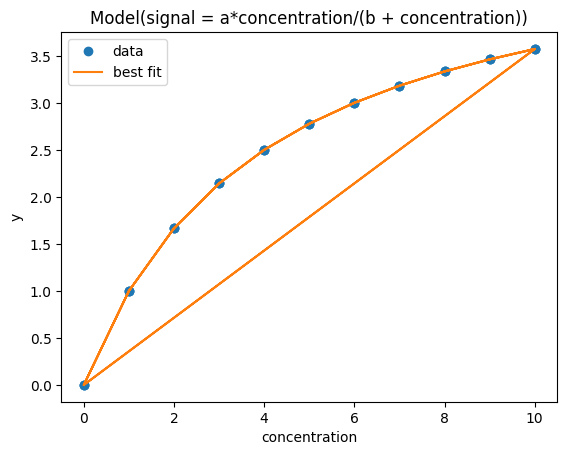

In [69]:
standard_curve.calculate_concentration(np.array([0.12]))
standard_curve.models["Rational"].visualize_fit()

In [70]:
#apply to enzymeml
import pyenzyme as pe
import json

In [72]:
standard_curve.conc_unit

None


ValidationError: 1 validation error for Replicate
data_unit
  none is not an allowed value (type=type_error.none.not_allowed)

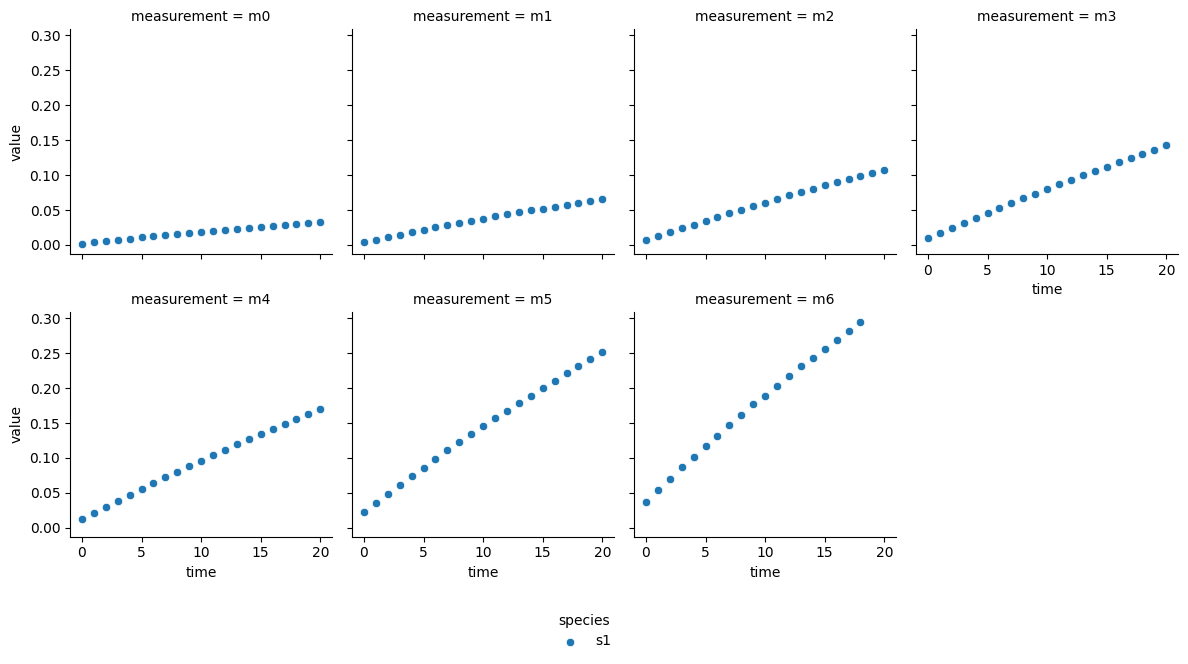

In [84]:
path = "/Users/max/Library/Mobile Documents/com~apple~CloudDocs/Documents/code/papers/MTP_inhibition/data/chymotrypsin/Chymotrypsin_ihnhibition_by_fusion_protein.omex"


enzdoc = pe.EnzymeMLDocument.fromFile(path)

enzdoc.visualize()


standard_curve.apply_to_EnzymeML(enzdoc, "s1")

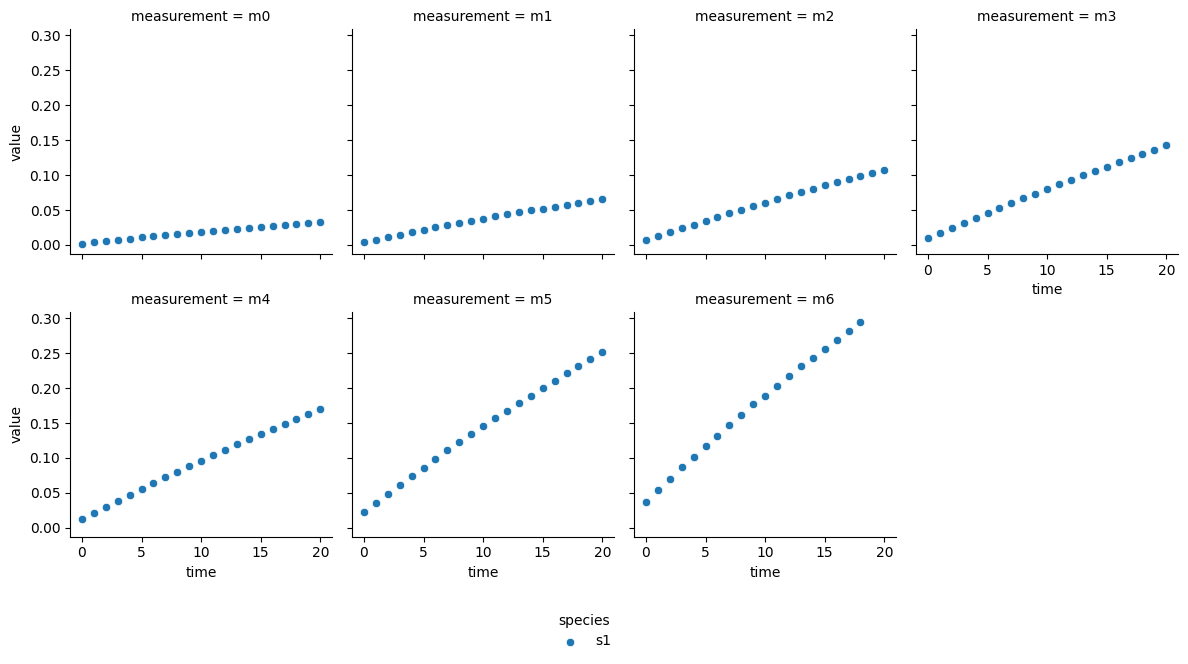

In [ ]:
enzdoc.visualize()

In [ ]:
from sympy import Symbol, Function, symbols, Eq


In [ ]:
kcat, Km, e, s, inact = symbols("kcat, Km, e, s, inact")

sympify

rein form von lamber omega

SyntaxError: invalid syntax (1556958584.py, line 5)